In [1]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns

FILE_PATH = "/mnt/hgfs/VM's Shared/polycubes/neighbors"

def read_file(cube_cnt, iter_cnt=100000):
    with open("%s/%d_cubes_%d_iterations.p"%(FILE_PATH, cube_cnt, iter_cnt), "rb") as f:
        return pickle.load(f)

In [2]:
MAX_CUBES = 100
ITERATIONS = 100000
dat = np.zeros(shape=(MAX_CUBES, ITERATIONS, 6))
for i in range(MAX_CUBES):
    dat[i, :, :] = read_file(i+1)

means  = np.mean(dat, axis=1)

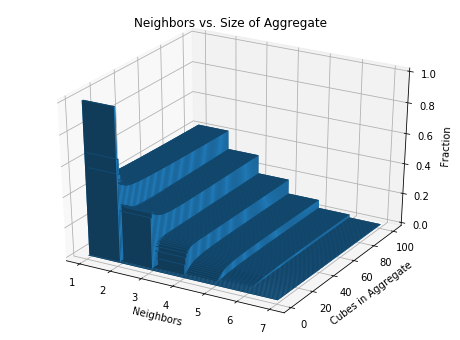

In [3]:
import numpy as np
import matplotlib.pyplot as plt
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import


# setup the figure and axes
fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(111, projection='3d')

# fake data
_x = np.arange(1,7)
_y = np.arange(1, MAX_CUBES+1)
_xx, _yy = np.meshgrid(_x, _y)
x, y = _xx.ravel(), _yy.ravel()


top = means.flatten()
bottom = np.zeros_like(top)
width = depth = 1

ax1.bar3d(x, y, bottom, width, depth, top, shade=True)
ax1.set_title('Neighbors vs. Size of Aggregate')
ax1.set_xlabel("Neighbors")
ax1.set_ylabel("Cubes in Aggregate")
ax1.set_zlabel("Fraction")


plt.savefig("test.pdf")
plt.show()
